In [1]:
# importing libraries
import numpy as np  # mathematical essentials
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
from sklearn.model_selection import train_test_split # training and testing
import statsmodels.formula.api as smf # linear modeling


# loading data
titanic = pd.read_excel('./datasetscl/titanic_exploration.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
titanic.head(n = 5)

pclass  survived                                     name     sex      age  sibsp  parch     fare cabin embarked boat  body                   home_dest
0       3         1  Dean, Miss. Elizabeth Gladys "Millvina"  female   0.1667      1      2  20.5750   NaN        S   10   NaN  Devon, England Wichita, KS
1       3         0                      Abbing, Mr. Anthony    male  42.0000      0      0   7.5500   NaN        S  NaN   NaN                         NaN
2       3         0            Abbott, Master. Eugene Joseph    male  13.0000      0      2  20.2500   NaN        S  NaN   NaN         East Providence, RI
3       3         1                   Baclini, Miss. Eugenie  female   0.7500      2      1  19.2583   NaN        C    C   NaN          Syria New York, NY
4       3         1            Baclini, Miss. Helene Barbara  female   0.7500      2      1  19.2583   NaN        C    C   NaN          Syria New York, NY

In [2]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [3]:
# pulling up data dictionary
titanic_description = pd.read_excel('./datasetscl/titanic_exploration.xlsx')

# displaying the data dictionary
titanic_description

pclass  survived                                     name     sex      age  sibsp  parch     fare cabin embarked boat  body                   home_dest
0          3         1  Dean, Miss. Elizabeth Gladys "Millvina"  female   0.1667      1      2  20.5750   NaN        S   10   NaN  Devon, England Wichita, KS
1          3         0                      Abbing, Mr. Anthony    male  42.0000      0      0   7.5500   NaN        S  NaN   NaN                         NaN
2          3         0            Abbott, Master. Eugene Joseph    male  13.0000      0      2  20.2500   NaN        S  NaN   NaN         East Providence, RI
3          3         1                   Baclini, Miss. Eugenie  female   0.7500      2      1  19.2583   NaN        C    C   NaN          Syria New York, NY
4          3         1            Baclini, Miss. Helene Barbara  female   0.7500      2      1  19.2583   NaN        C    C   NaN          Syria New York, NY
...      ...       ...                                      ...     ...      ...    ...    ...      ...   ...      ...  ...   ...                         ...
1037       1         1                        Woolner, Mr. Hugh    male      NaN      0      0  35.5000   C52        S    D   NaN             London, England
1038       3         1         Mullens, Miss. Katherine "Katie"  female      NaN      0      0   7.7333   NaN        Q   16   NaN                         NaN
1039       1         0                       Wright, Mr. George    male  62.0000      0      0  26.5500   NaN        S  NaN   NaN                 Halifax, NS
1040       3         1           Murphy, Miss. Katherine "Kate"  female      NaN      1      0  15.5000   NaN        Q   16   NaN                         NaN
1041       3         1              Murphy, Miss. Margaret Jane  female      NaN      1      0  15.5000   NaN        Q   16   NaN                         NaN

[1042 rows x 13 columns]

In [4]:
# dropping post-event horizon features
titanic = titanic.drop(labels = 'body',
                       axis   = 1)


# checking results
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked', 'boat', 'home_dest'], dtype='object')

In [9]:
# running the mv_flagger function
titanic = mv_flagger(df = titanic)


# checking results
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked', 'boat', 'home_dest', 'm_age', 'm_cabin', 'm_boat', 'm_home_dest'], dtype='object')

In [10]:
# saving results
titanic.to_excel('./datasetscl/titanic_feature_rich.xlsx',
                 index = False)

In [11]:
# loading saved file
titanic = pd.read_excel('./datasetscl/titanic_feature_rich.xlsx')

In [12]:
# checking for missing values
titanic.isnull().sum() 

pclass           0
survived         0
name             0
sex              0
age            169
sibsp            0
parch            0
fare             0
cabin          758
embarked         0
boat           609
home_dest      301
m_age            0
m_cabin          0
m_boat           0
m_home_dest      0
dtype: int64

In [13]:
# creating potential youth column
titanic['potential_youth'] = 0

# looping to find Miss. and Master
for index, val in titanic.iterrows():
    
    # checking for Miss.
    if 'Miss.' in titanic.loc[ index , 'name']:
        titanic.loc[index, 'potential_youth'] = 1
        
    # checking for Master
    elif 'Master' in titanic.loc[ index , 'name']:
        titanic.loc[index, 'potential_youth'] = 1

        
# checking results
print(f"""
Mean Age:                     {round(titanic.loc[ : , 'age'].mean(),1)}
Mean Male Age:                {round(titanic.loc[ : , 'age'][titanic['sex'] == 'male'].mean(),1)}
Mean Female Age:              {round(titanic.loc[ : , 'age'][titanic['sex'] == 'female'].mean(),1)}
Mean Potential Youth Age:     {round(titanic.loc[ : , 'age'][titanic['potential_youth'] == 1].mean(),1)}
Mean NOT Potential Youth Age: {round(titanic.loc[ : , 'age'][titanic['potential_youth'] != 1][titanic['sex'] == 'female'].mean(),1)}
""")


Mean Age:                     31.0
Mean Male Age:                31.8
Mean Female Age:              29.6
Mean Potential Youth Age:     20.1
Mean NOT Potential Youth Age: 37.1



In [14]:
# imputing missing values for age

# storing average age for female WITH Miss. in name
miss_female_avg_age = round(titanic.loc[ : , 'age']\
                           [titanic['potential_youth'] == 1]\
                           [titanic['sex'] == 'female'].mean(),
                            ndigits = 1)


# storing average age for male WITH Master in title
master_male_avg_age = round(titanic.loc[ : , 'age']\
                           [titanic['potential_youth'] == 1]\
                           [titanic['sex'] == 'male'].mean(),
                            ndigits = 1)


# storing average age for female WITHOUT Miss. in title
nm_female_avg_age   = round(titanic.loc[ : , 'age']\
                           [titanic['potential_youth'] != 1]\
                           [titanic['sex'] == 'female'].mean(),
                            ndigits = 1)


# storing average age for male WITHOUT Master in title
nm_male_avg_age   = round(titanic.loc[ : , 'age']\
                           [titanic['potential_youth'] != 1]\
                           [titanic['sex'] == 'male'].mean(),
                            ndigits = 1)



# imputing missing values for age
for index, val in titanic.iterrows():

    
    # imputing age for females with Miss.
    if str(titanic.loc[index, 'age']).lower() == 'nan' and \
             titanic.loc[index, 'sex'] == 'female'       and \
             titanic.loc[index, 'potential_youth'] == 1:
        
         titanic.loc[index, 'age'] = miss_female_avg_age
            
    

    # imputing age for males with Master
    elif str(titanic.loc[index, 'age']).lower() == 'nan' and \
             titanic.loc[index, 'sex'] == 'male'         and \
             titanic.loc[index, 'potential_youth'] == 1:
        
         titanic.loc[index, 'age'] = master_male_avg_age   
    
    
    # not miss and female
    elif str(titanic.loc[index, 'age']).lower() == 'nan' and \
             titanic.loc[index, 'sex'] == 'female'       and \
             titanic.loc[index, 'potential_youth'] != 1:
        
         titanic.loc[index, 'age'] = nm_female_avg_age


            
    # not master and male
    elif str(titanic.loc[index, 'age']).lower() == 'nan' and \
             titanic.loc[index, 'sex'] == 'male'       and \
             titanic.loc[index, 'potential_youth'] != 1:
        
         titanic.loc[index, 'age'] = nm_male_avg_age
            

# ensuring all missing values for age are taken care of
titanic.loc[ :, 'age'].isnull().sum()

0

In [15]:
# placeholder for 'child' feature
titanic['child'] = 0


# replacing values based on a condition
for index, val in titanic.iterrows():
    if titanic.loc[index, 'age'] < 18:
        titanic.loc[index, 'child'] = 1


# checking results
titanic['child'].sum()

114

In [16]:
# saving results
titanic.to_excel('./datasetscl/titanic_feature_rich.xlsx',
                 index = False)

In [17]:
# loading saved file
titanic = pd.read_excel('./datasetscl/titanic_feature_rich.xlsx')

In [18]:
# imputing missing values
titanic['home_dest'] = titanic['home_dest'].fillna('Unknown')


# checking results
titanic['home_dest'].isnull().sum()

0

In [19]:
# saving results
titanic.to_excel('./datasetscl/titanic_feature_rich.xlsx',
                 index = False)

In [20]:
# loading saved file
titanic = pd.read_excel('./datasetscl/titanic_feature_rich.xlsx')

In [21]:
# calling text_split_feature
text_split_feature(col = 'name',
                   df  = titanic)


# checking results
titanic['number_of_names'].value_counts().sort_index()

3     332
4     454
5     112
6      70
7      57
8      14
9       2
14      1
Name: number_of_names, dtype: int64

In [22]:
# one hot encoding variables
one_hot_pclass       = pd.get_dummies(titanic['pclass'])
one_hot_sex          = pd.get_dummies(titanic['sex'])


# joining codings together
titanic = titanic.join([one_hot_pclass, one_hot_sex])


# checking results
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked', 'boat', 'home_dest', 'm_age', 'm_cabin', 'm_boat', 'm_home_dest', 'potential_youth', 'child', 'number_of_names', 1, 2, 3, 'female', 'male'], dtype='object')

In [23]:
# relabeling columns
titanic.columns = ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
                   'parch', 'fare', 'cabin', 'embarked', 'boat', 'home_dest',
                   'm_age', 'm_cabin', 'm_boat', 'm_home_dest',
                   'potential_youth', 'child', 'number_of_names',
                   'pclass_1', 'pclass_2', 'pclass_3', # changed pclass labels
                   'female', 'male']


# checking results
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked', 'boat', 'home_dest', 'm_age', 'm_cabin', 'm_boat', 'm_home_dest', 'potential_youth', 'child', 'number_of_names', 'pclass_1', 'pclass_2', 'pclass_3', 'female', 'male'], dtype='object')

In [24]:
# dropping categorical variables after they've been encoded
titanic = titanic.drop(['pclass', 'name', 'sex', 'cabin',
                        'boat', 'home_dest', 'embarked'], axis = 1)


# checking the results
titanic.columns

Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'm_age', 'm_cabin', 'm_boat', 'm_home_dest', 'potential_youth', 'child', 'number_of_names', 'pclass_1', 'pclass_2', 'pclass_3', 'female', 'male'], dtype='object')

In [25]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [26]:
df_corr = titanic.corr(method = 'pearson').round(decimals = 2)

df_corr['survived'].sort_values(ascending = False)

survived           1.00
female             0.55
potential_youth    0.33
number_of_names    0.32
pclass_1           0.26
fare               0.24
parch              0.14
child              0.13
sibsp              0.05
pclass_2           0.01
m_age             -0.07
age               -0.09
m_home_dest       -0.14
pclass_3          -0.25
m_cabin           -0.29
male              -0.55
m_boat            -0.95
Name: survived, dtype: float64

In [27]:
# declaring explanatory variables
titanic_data = titanic.drop('survived', axis = 1 )


# declaring response variable
titanic_response = titanic.loc[: ,'survived']

In [28]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            titanic_data,
            titanic_response,
            test_size    = 0.25,
            random_state = 219,
            stratify     = titanic_response)


# merging training data for statsmodels
titanic_train = pd.concat([x_train, y_train], axis = 1)

In [29]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
0    0.58
1    0.42
Name: survived, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
0    0.57
1    0.43
Name: survived, dtype: float64



In [30]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = 'survived ~ m_boat',
                           data = titanic_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.113228
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  781
Model:                          Logit   Df Residuals:                      779
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 May 2021   Pseudo R-squ.:                  0.8339
Time:                        11:36:17   Log-Likelihood:                -88.431
converged:                       True   LL-Null:                       -532.25
Covariance Type:            nonrobust   LLR p-value:                4.792e-195
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1495      0.451      9.206      0.000       3.266       5.033
m_boat        -7.6085      0.526    -14.461      0.000      -8.640      -6.577
==============================================================================
"""

In [31]:
for val in titanic_data:
    print(f" {val} + ")

 age + 
 sibsp + 
 parch + 
 fare + 
 m_age + 
 m_cabin + 
 m_boat + 
 m_home_dest + 
 potential_youth + 
 child + 
 number_of_names + 
 pclass_1 + 
 pclass_2 + 
 pclass_3 + 
 female + 
 male + 


In [32]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ survived ~ m_boat+
                                                     age + 
                                                     sibsp + 
                                                     parch + 
                                                     fare + 
                                                     m_age +
                                                     m_cabin + 
                                                     m_boat + 
                                                     m_home_dest +
                                                     potential_youth + 
                                                     child + 
                                                     number_of_names + 
                                                     pclass_1 + 
                                                     pclass_2 + 
                                                     pclass_3 + 
                                                     female + 
                                                     male""",
                                        data    = titanic_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.076045
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  781
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                           14
Date:                Fri, 14 May 2021   Pseudo R-squ.:                  0.8884
Time:                        11:36:33   Log-Likelihood:                -59.391
converged:                       True   LL-Null:                       -532.25
Covariance Type:            nonrobust   LLR p-value:                6.889e-193
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.7764   1.68e+07  -2.25e-07      1.000   -3.28e+07    3.28e+07
m_boat             -8.6236      0.869     -9.918      0.000     -10.328      -6.919
age                -0.0028      0.033     -0.083      0.934      -0.068       0.063
sibsp              -0.3623      0.399     -0.908      0.364      -1.144       0.420
parch              -0.2838      0.570     -0.498      0.619      -1.401       0.834
fare                0.0041      0.009      0.440      0.660      -0.014       0.022
m_age               0.0907      0.769      0.118      0.906      -1.416       1.597
m_cabin            -0.9030      1.139     -0.793      0.428      -3.135       1.329
m_home_dest         0.1900      0.741      0.256      0.798      -1.263       1.643
potential_youth    -0.8440      0.911     -0.926      0.354      -2.630       0.942
child               1.7354      0.960      1.808      0.071      -0.145       3.616
number_of_names    -0.1511      0.269     -0.562      0.574      -0.678       0.376
pclass_1            8.5742   1.31e+07   6.53e-07      1.000   -2.57e+07    2.57e+07
pclass_2            9.1944   1.31e+07   7.04e-07      1.000   -2.56e+07    2.56e+07
pclass_3            8.2808   1.31e+07    6.3e-07      1.000   -2.57e+07    2.57e+07
female              4.1537    1.3e+07   3.19e-07      1.000   -2.55e+07    2.55e+07
male               -0.4736    1.3e+07  -3.64e-08      1.000   -2.55e+07    2.55e+07
===================================================================================
"""

In [33]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ m_boat ~
                                     age +
                                     sibsp +
                                     parch +
                                     fare +
                                     m_age +
                                     m_cabin +
                                     m_home_dest +
                                     potential_youth +
                                     child +
                                     number_of_names +
                                     pclass_1 +
                                     pclass_2 +
                                     pclass_3 +
                                     female +
                                     male""",
                                     data    = titanic_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full.summary()

Optimization terminated successfully.
         Current function value: 0.452130
         Iterations 7


/Users/briankurniawan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/briankurniawan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 m_boat   No. Observations:                  781
Model:                          Logit   Df Residuals:                      767
Method:                           MLE   Df Model:                           13
Date:                Fri, 14 May 2021   Pseudo R-squ.:                  0.3328
Time:                        11:36:51   Log-Likelihood:                -353.11
converged:                       True   LL-Null:                       -529.27
Covariance Type:            nonrobust   LLR p-value:                 2.532e-67
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.4010    1.1e+07  -3.66e-08      1.000   -2.15e+07    2.15e+07
age                 0.0431      0.011      4.058      0.000       0.022       0.064
sibsp               0.3300      0.135      2.436      0.015       0.065       0.595
parch              -0.2351      0.150     -1.570      0.117      -0.529       0.058
fare               -0.0008      0.003     -0.318      0.751      -0.006       0.004
m_age              -0.3721      0.280     -1.330      0.184      -0.921       0.176
m_cabin             1.1884      0.305      3.894      0.000       0.590       1.786
m_home_dest         0.0728      0.273      0.267      0.790      -0.463       0.608
potential_youth    -0.4802      0.356     -1.349      0.177      -1.178       0.218
child               0.0477      0.410      0.116      0.907      -0.755       0.851
number_of_names    -0.3364      0.107     -3.158      0.002      -0.545      -0.128
pclass_1           -0.7287   1.29e+07  -5.66e-08      1.000   -2.52e+07    2.52e+07
pclass_2            0.0889   1.31e+07   6.79e-09      1.000   -2.56e+07    2.56e+07
pclass_3            0.6166   1.32e+07   4.66e-08      1.000   -2.59e+07    2.59e+07
female             -1.1344        nan        nan        nan         nan         nan
male                0.8278        nan        nan        nan         nan         nan
===================================================================================
"""

In [34]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ m_boat ~
                                    age +
                                    sibsp +
                                    m_cabin +
                                    number_of_names +
                                    pclass_1 +
                                    female""",
                                    data = titanic_train)

# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary()

Optimization terminated successfully.
         Current function value: 0.459160
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 m_boat   No. Observations:                  781
Model:                          Logit   Df Residuals:                      774
Method:                           MLE   Df Model:                            6
Date:                Fri, 14 May 2021   Pseudo R-squ.:                  0.3225
Time:                        11:37:24   Log-Likelihood:                -358.60
converged:                       True   LL-Null:                       -529.27
Covariance Type:            nonrobust   LLR p-value:                 1.120e-70
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4120      0.497      0.829      0.407      -0.562       1.386
age                 0.0494      0.009      5.681      0.000       0.032       0.066
sibsp               0.2413      0.120      2.019      0.043       0.007       0.476
m_cabin             1.2203      0.300      4.074      0.000       0.633       1.807
number_of_names    -0.3108      0.091     -3.427      0.001      -0.489      -0.133
pclass_1           -1.1929      0.304     -3.929      0.000      -1.788      -0.598
female             -2.2502      0.206    -10.925      0.000      -2.654      -1.846
===================================================================================
"""

In [35]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['age', 'sibsp', 'parch', 'fare', 'm_age', 'm_cabin',
                   'm_home_dest', 'potential_youth', 'child',
                   'number_of_names', 'pclass_1', 'pclass_2', 'female'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['age' , 'sibsp', 'm_cabin', 'number_of_names',
                   'pclass_1', 'female'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['age', 'sibsp', 'm_cabin', 'number_of_names',
                   'pclass_2', 'female']

}

In [36]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['age', 'sibsp', 'parch', 'fare', 'm_age', 'm_cabin', 'm_home_dest', 'potential_youth', 'child', 'number_of_names', 'pclass_1', 'pclass_2', 'female']


First Significant p-value Model:
--------------------------------
['age', 'sibsp', 'm_cabin', 'number_of_names', 'pclass_1', 'female']


Second Significant p-value Model:
---------------------------------
['age', 'sibsp', 'm_cabin', 'number_of_names', 'pclass_2', 'female']



In [45]:
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf   
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
import seaborn as sns                                #enchanced data Viz

In [39]:
# train/test split with the full model
titanic_data   =  titanic.loc[ : , candidate_dict['logit_sig_2']]
titanic_target =  titanic.loc[ : , 'm_boat']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            titanic_data,
            titanic_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = titanic_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7836
LogReg Testing  ACCURACY: 0.7011
LogReg Train-Test Gap   : 0.0825


In [42]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 66  42]
 [ 36 117]]


In [43]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 66
False Positives: 42
False Negatives: 36
True Positives : 117



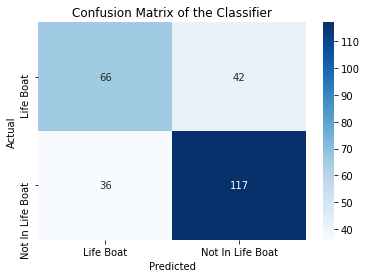

In [46]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Life Boat', 'Not In Life Boat'])

In [47]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6879


In [48]:
# zipping each feature name to its coefficient
logreg_model_values = zip(titanic[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 0.51)
('age', 0.04)
('sibsp', 0.38)
('m_cabin', 1.75)
('number_of_names', -0.49)
('pclass_2', -0.33)
('female', -2.0)


Part VI: Classification Trees (CART Models)

Tree models are very useful in classification problems as they output interesting tools such as tree plots and feature importance. As they are a nonparametric model type, they have no coefficients.

CART Model Highlights

great for finding split points to engineer features
tend to overfit unless pruned
tend to be worse at prediction than other model types (after pruning)

Run the following code to import the packages needed for classification trees. Note that you may get an error stating that you need to install some of the packages.

In [49]:
%pip install six

Note: you may need to restart the kernel to use updated packages.


In [50]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [51]:
# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

In [52]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [53]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.9193
Full Tree Testing ACCURACY : 0.6782
Full Tree AUC Score: 0.6846


In [54]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 78
False Positives: 30
False Negatives: 54
True Positives : 99



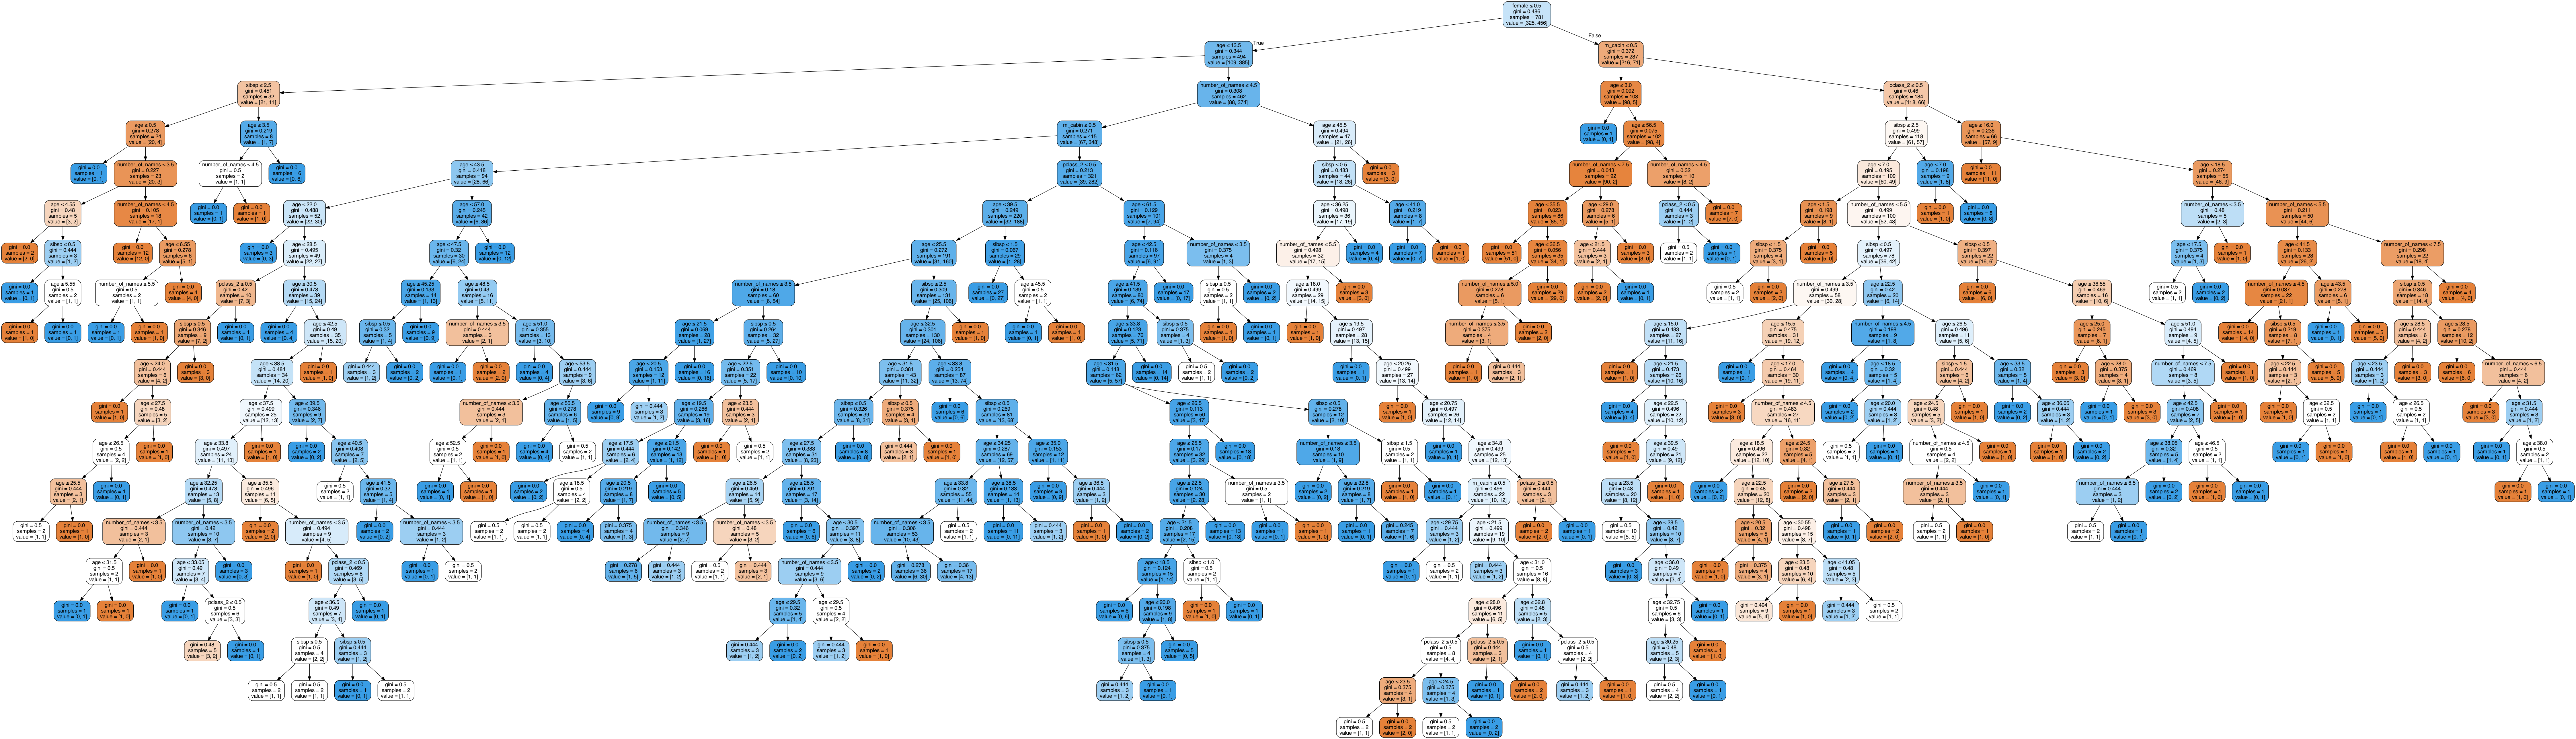

In [55]:
# calling display_tree
display_tree(tree       = full_tree_fit,
             feature_df = x_train)

In [56]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 4,
                    min_samples_leaf = 25,
                    random_state = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pred).round(4) # auc

Training ACCURACY: 0.7926
Testing  ACCURACY: 0.751
AUC Score        : 0.7358


In [57]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 70
False Positives: 38
False Negatives: 27
True Positives : 126



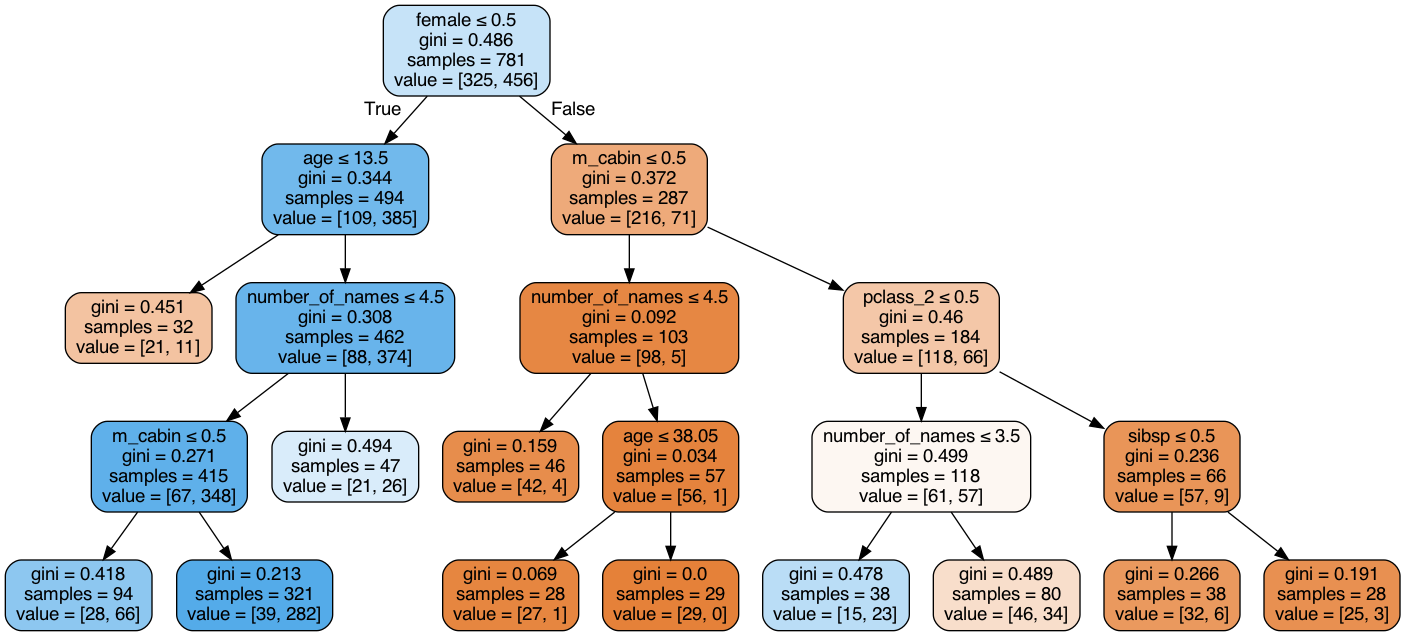

In [58]:
# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = x_train)

In [61]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_results/classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6879         (66, 42, 36, 117)
Full Tree     0.6846         (78, 30, 54, 99)
Pruned Tree   0.7358         (70, 38, 27, 126)



FileCreateError: [Errno 2] No such file or directory: './model_results/classification_model_performance.xlsx'

In [62]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800, export = False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    export     : bool, defalut False
        whether or not to export the tree as a .png file
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)


    return img

In [63]:
# train/test split with the logit_sig variables
titanic_data   =  titanic.loc[ : , candidate_dict['logit_sig']]
titanic_target =  titanic.loc[ : ,'m_boat']


# train/test split
x_test, x_train, y_test, y_train = train_test_split(
            titanic_data,
            titanic_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = titanic_target)

In [64]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [65]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7241
Testing  ACCURACY: 0.7746
AUC Score        : 0.7659


In [67]:
# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

In [68]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(titanic_data, titanic_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

<ipython-input-68-31fb73f762ac>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  C_space          = pd.np.arange(0.1, 5.0, 0.1)


Tuned Parameters  : {'warm_start': True, 'solver': 'newton-cg', 'C': 3.0000000000000004}
Tuned CV AUC      : 0.7615


In [69]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7241
LR Tuned Testing  ACCURACY: 0.7862
LR Tuned AUC Score        : 0.7753


In [70]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 231
False Positives: 94
False Negatives: 73
True Positives : 383



In [71]:
# loading model performance
model_performance = pd.read_excel('./model_resultss/classification_model_performance.xlsx')


# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0     Logistic     0.6879             0.7836            0.7011   (66, 42, 36, 117)
1    Full Tree     0.6754             0.9193            0.6705    (76, 32, 54, 99)
2  Pruned Tree     0.7358             0.7926            0.7510   (70, 38, 27, 126)
3   Tuned Tree     0.7820             0.7586            0.7887  (241, 84, 81, 375)
4   GBM (Full)     0.7503             0.8924            0.7663   (71, 37, 24, 129)
5    Tuned GBM     0.7612             0.8553            0.7663   (79, 29, 32, 121)
6     Tuned LR     0.7753             0.7241            0.7862  (231, 94, 73, 383)

In [72]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)



# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}



# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)



# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))




# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(titanic_data, titanic_target)



# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))




<ipython-input-72-01f721c0ff9f>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
<ipython-input-72-01f721c0ff9f>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 3, 'max_depth': 4, 'criterion': 'gini'}
Tuned Training AUC: 0.7736


In [73]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7586
Testing  ACCURACY: 0.7887
AUC Score        : 0.782


In [74]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 241
False Positives: 84
False Negatives: 81
True Positives : 375



In [75]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance


Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0     Logistic     0.6879             0.7836            0.7011   (66, 42, 36, 117)
1    Full Tree     0.6754             0.9193            0.6705    (76, 32, 54, 99)
2  Pruned Tree     0.7358             0.7926            0.7510   (70, 38, 27, 126)
3   Tuned Tree     0.7820             0.7586            0.7887  (241, 84, 81, 375)
4   GBM (Full)     0.7503             0.8924            0.7663   (71, 37, 24, 129)
5    Tuned GBM     0.7612             0.8553            0.7663   (79, 29, 32, 121)
6     Tuned LR     0.7753             0.7241            0.7862  (231, 94, 73, 383)
7   Tuned Tree     0.7820             0.7586            0.7887  (241, 84, 81, 375)

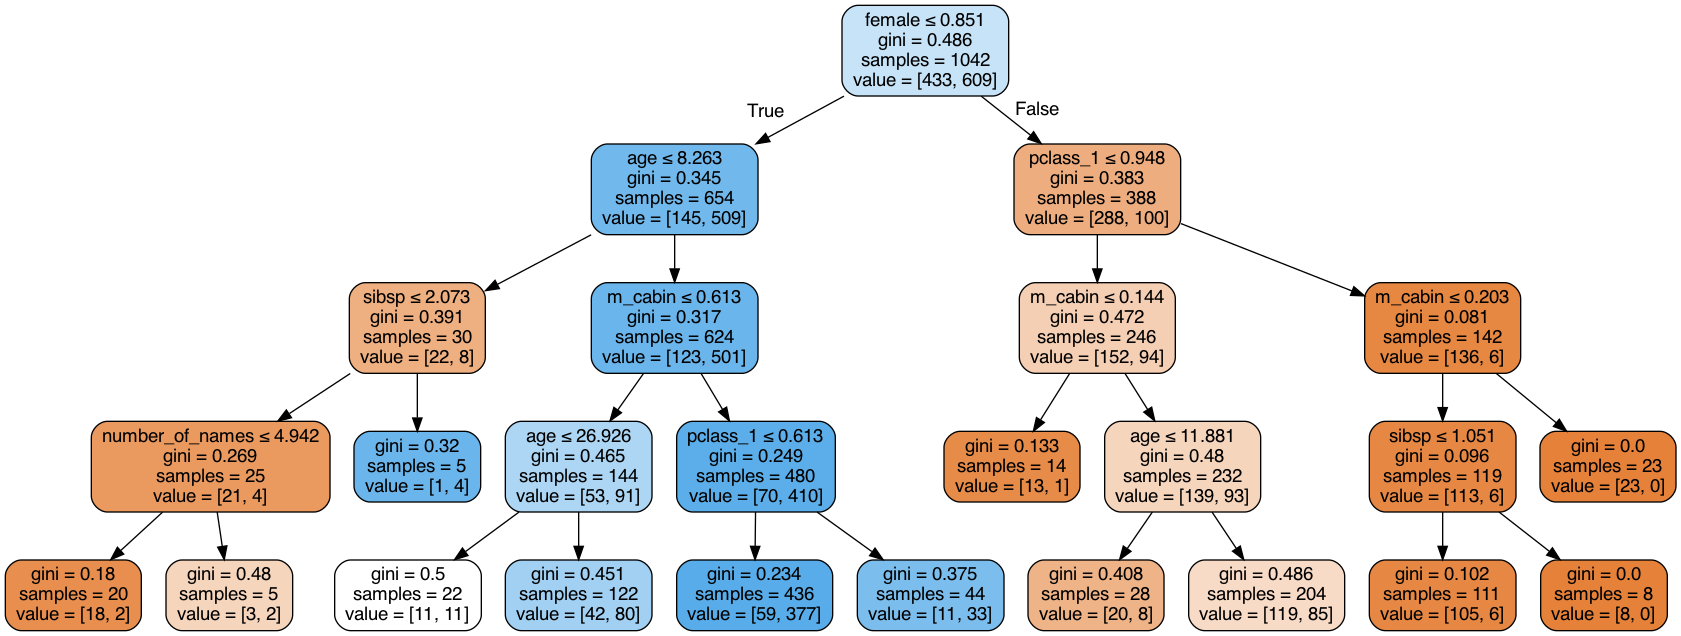

In [76]:
# displaying the tree
display_tree(tree = tree_tuned,
             feature_df = titanic_data,
             height = 1500,
             width  = 1500)



In [77]:
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0     Logistic     0.6879             0.7836            0.7011   (66, 42, 36, 117)
1    Full Tree     0.6754             0.9193            0.6705    (76, 32, 54, 99)
2  Pruned Tree     0.7358             0.7926            0.7510   (70, 38, 27, 126)
3   Tuned Tree     0.7820             0.7586            0.7887  (241, 84, 81, 375)
4   GBM (Full)     0.7503             0.8924            0.7663   (71, 37, 24, 129)
5    Tuned GBM     0.7612             0.8553            0.7663   (79, 29, 32, 121)
6     Tuned LR     0.7753             0.7241            0.7862  (231, 94, 73, 383)
7   Tuned Tree     0.7820             0.7586            0.7887  (241, 84, 81, 375)

In [78]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [79]:
# train/test split with the logit_full variables
titanic_data   =  titanic.loc [ : , candidate_dict['logit_full']]
titanic_target =  titanic.loc [ : , 'm_boat']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            titanic_data,
            titanic_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = titanic_target)

In [81]:
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

In [82]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = "gini",
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [83]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.9923
Testing  ACCURACY: 0.7586
AUC Score        : 0.7505


In [84]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 76
False Positives: 32
False Negatives: 31
True Positives : 122



In [85]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0              Logistic     0.6879             0.7836            0.7011   (66, 42, 36, 117)
1             Full Tree     0.6754             0.9193            0.6705    (76, 32, 54, 99)
2           Pruned Tree     0.7358             0.7926            0.7510   (70, 38, 27, 126)
3            Tuned Tree     0.7820             0.7586            0.7887  (241, 84, 81, 375)
4            GBM (Full)     0.7503             0.8924            0.7663   (71, 37, 24, 129)
5             Tuned GBM     0.7612             0.8553            0.7663   (79, 29, 32, 121)
6              Tuned LR     0.7753             0.7241            0.7862  (231, 94, 73, 383)
7            Tuned Tree     0.7820             0.7586            0.7887  (241, 84, 81, 375)
8  Random Forest (Full)     0.7505             0.9923            0.7586   (76, 32, 31, 122)

In [86]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(titanic_data, titanic_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

<ipython-input-86-54d9c24e59d2>:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space  = pd.np.arange(100, 1100, 250)
<ipython-input-86-54d9c24e59d2>:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space       = pd.np.arange(1, 31, 10)
/Users/briankurniawan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 96 is smaller than n_iter=1000. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 350, 'min_samples_leaf': 11, 'criterion': 'entropy', 'bootstrap': True}
Tuned Training AUC: 0.7801


In [87]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_leaf=11,
                       n_estimators=350, random_state=219, warm_start=True)

In [88]:
# building a model based on hyperparameter tuning results

# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(criterion='entropy',
                                      min_samples_leaf=11,
                                      n_estimators=350,
                                      random_state=219,
                                      warm_start=True)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8348
Forest Tuned Testing  ACCURACY: 0.7931
Forest Tuned AUC Score        : 0.7772


<ipython-input-78-141a9830ad1b>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


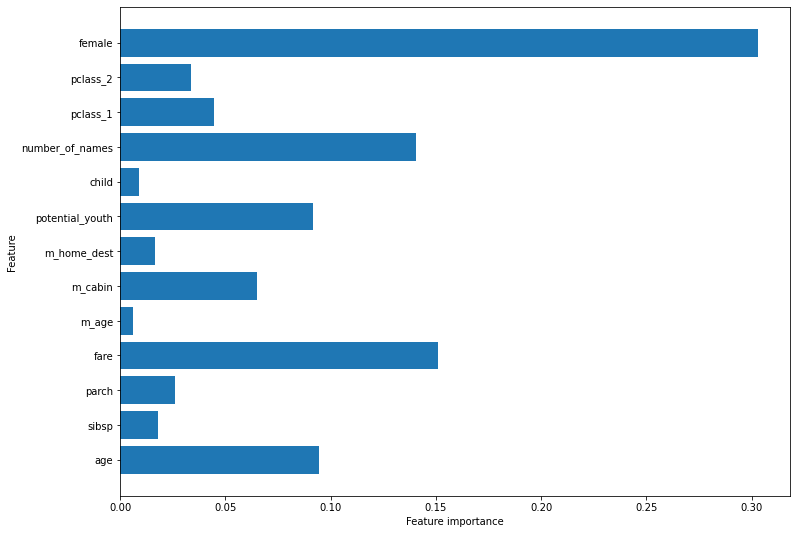

In [89]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [90]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 74
False Positives: 34
False Negatives: 20
True Positives : 133



In [91]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0                    Logistic     0.6879             0.7836            0.7011   (66, 42, 36, 117)
1                   Full Tree     0.6754             0.9193            0.6705    (76, 32, 54, 99)
2                 Pruned Tree     0.7358             0.7926            0.7510   (70, 38, 27, 126)
3                  Tuned Tree     0.7820             0.7586            0.7887  (241, 84, 81, 375)
4                  GBM (Full)     0.7503             0.8924            0.7663   (71, 37, 24, 129)
5                   Tuned GBM     0.7612             0.8553            0.7663   (79, 29, 32, 121)
6                    Tuned LR     0.7753             0.7241            0.7862  (231, 94, 73, 383)
7                  Tuned Tree     0.7820             0.7586            0.7887  (241, 84, 81, 375)
8        Random Forest (Full)     0.7505             0.9923            0.7586   (76, 32, 31, 122)
9  Tuned Random Forest (Full)     0.7772             0.8348            0.7931   (74, 34, 20, 133)

In [92]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8924
Testing ACCURACY : 0.7663
AUC Score        : 0.7503


In [93]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 71
False Positives: 37
False Negatives: 24
True Positives : 129



In [94]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy    Confusion Matrix
0                     Logistic     0.6879             0.7836            0.7011   (66, 42, 36, 117)
1                    Full Tree     0.6754             0.9193            0.6705    (76, 32, 54, 99)
2                  Pruned Tree     0.7358             0.7926            0.7510   (70, 38, 27, 126)
3                   Tuned Tree     0.7820             0.7586            0.7887  (241, 84, 81, 375)
4                   GBM (Full)     0.7503             0.8924            0.7663   (71, 37, 24, 129)
5                    Tuned GBM     0.7612             0.8553            0.7663   (79, 29, 32, 121)
6                     Tuned LR     0.7753             0.7241            0.7862  (231, 94, 73, 383)
7                   Tuned Tree     0.7820             0.7586            0.7887  (241, 84, 81, 375)
8         Random Forest (Full)     0.7505             0.9923            0.7586   (76, 32, 31, 122)
9   Tuned Random Forest (Full)     0.7772             0.8348            0.7931   (74, 34, 20, 133)
10                  GBM (Full)     0.7503             0.8924            0.7663   (71, 37, 24, 129)